### Code for sorting data produced in simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Settings to be modified

In [2]:
versions = np.array(['1-link', '2-links'])
name = versions[1]

prMax, spMax = 2,3
prMax, spMax = prMax + 1, spMax + 1

nMax = 40

init_density = 1e-10
beta = 0.7

## Importing data

Data from "stability file". Saved as:  
addAttempt - Nspecies - feasible - stable - extinct species/behaviour of food web

In [3]:
stabData = np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/stab_data.txt');

Data from "producer file". Saved as:  
overall addAttempt - index - addAttempt of species - level - density - 

In [4]:
partData = []

for sp in range(spMax) :
    partData.append(np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/species_par_0' + str(sp) + '.txt'))
sp_par = np.concatenate(partData)

Data from "species file". Saved as:  
overall addAttempt - index - addAttempt of species - level - density - 

In [5]:
partData = []

for pd in range(prMax) :
    partData.append(np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/basal_par_0' + str(pd) + '.txt'))
pd_par = np.concatenate(partData)

In [26]:
invasive =[[0, 0, 0, 1, []] for i in range(Nweb)]
# [death][number of species in food web][decay rate][level][links]
# default: producer

Number of invasions: 96794


## Sorting the data
### Extinct species and total number of species

Total number of invasions: 96794
Successfull invasions: 29409

Success fraction: 0.3038



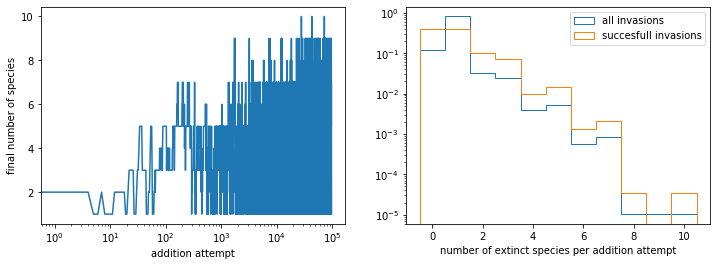

In [16]:
# Preparing arrays
Nweb = int(stabData[-1,0])
print(f'Total number of invasions: {Nweb:2.0f}')

Nspecies = np.zeros([Nweb,2])         # [initial number, final number] 
Nprod = np.zeros_like(Nspecies)
extinct = [[] for i in range(Nweb)]   # extinct species per food web
death = Nweb*np.ones(Nweb)                # addAttempt that kills species added at index


# Looping through stabData
i = 0
for web in range(Nweb) :
    Nspecies[web,0] = stabData[i,1]   # saving initial number of species
    
    while stabData[i,0] == web:
        if stabData[i+1,0] == stabData[i,0]+1 :
            Nspecies[web,1] = stabData[i,1]           # saving final number of species
    
        else :
            extinct[web].append(int(stabData[i,4]))   # saving extinct species
            death[int(stabData[i,4])] = web
        i += 1                                    


Nextinct = abs(Nspecies[:,1] - Nspecies[:,0])         # number of extinct species per addition attempt

# Creating mask for successful invasions
success = np.zeros(Nweb)
for i in range(Nweb) :
    if i not in extinct[i] :
        success[i] = True
success = success.astype(bool)

print(f'Successfull invasions: {len(Nextinct[success]):2.0f}')
print(f'\nSuccess fraction: {len(Nextinct[success])/Nweb:2.4}\n')
    
    
# plotting    
fig, ax = plt.subplots(1,2, figsize=(12,4));
ax[0].plot(Nspecies[:,1]);
ax[0].set(xscale='log', xlabel='addition attempt', ylabel='final number of species');

ax[1].hist(Nextinct, bins=int(max(Nextinct)+1-min(Nextinct)), range=[min(Nextinct)-0.5, max(Nextinct)+0.5], \
           density=True, histtype='step', label='all invasions');
ax[1].hist(Nextinct[success], bins=int(max(Nextinct)+1-min(Nextinct)), range=[min(Nextinct)-0.5,max(Nextinct)+0.5], \
           density=True, histtype='step', label='succesfull invasions');
ax[1].set(yscale='log', xlabel='number of extinct species per addition attempt');
ax[1].legend();

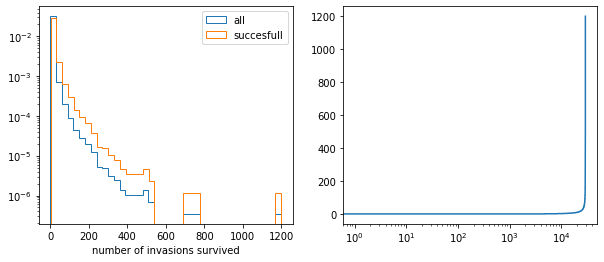

In [7]:
lifetime = np.arange(Nweb-1)
lifetime = death[0:-1] - lifetime

success = (lifetime>0)

fig, ax = plt.subplots(1,2, figsize=(10,4));
ax[0].hist(lifetime, bins=40, density=True, histtype='step', label='all');
ax[0].hist(lifetime[success], bins=40, density=True, histtype='step', label='succesfull');
ax[0].set(xlabel='number of invasions survived')
ax[0].legend();
ax[0].set(yscale='log');

lifetime_sorted = np.sort(lifetime[success])

ax[1].plot(lifetime_sorted);
ax[1].set(xscale='log');

In [55]:
# Obtaining index of extinct species
extinct_index = [] #np.zeros_like(extinct)

pd, sp = 0, 0
for web in range(Nweb) :
    i = 0
    temp_arr = []
    while pd_par[pd,0] == web :
        Nprod[web,0] = pd_par[pd,1] + 1
        if pd_par[pd,2] in extinct[web] :
            temp_arr.append(int(pd_par[pd,1]))
            
        if web >= 1 and pd_par[pd,4] != init_density:
            Nprod[web-1,1] = pd_par[pd,1] + 1
        pd += 1
    
    while sp_par[sp,0] == web :
        if sp_par[sp,2] in extinct[web] :
            temp_arr.append(int(sp_par[sp,1]))
        sp += 1
    extinct_index.append(temp_arr)
    
Nprod = Nprod.astype(int)

In [9]:
biomass_i = [[] for i in range(Nweb)]
biomass_f = [[] for i in range(Nweb)]
level_i = [[] for i in range(Nweb)]
level_f = [[] for i in range(Nweb)]
id_i = [[] for i in range(Nweb)]
id_f = [[] for i in range(Nweb)]

pd, sp = 0, 0 
for web in range(Nweb) : 
    while pd_par[pd,0] == web :
        id_i[web].append(pd_par[pd,2])
        biomass_i[web].append(pd_par[pd,4])
        if web >= 1 and pd_par[pd,4] != init_density :
            id_f[web-1].append(pd_par[pd,2])
            biomass_f[web-1].append(pd_par[pd,4])
        
        level_i[web].append(1)
        if pd_par[pd,2] not in extinct[web] :
            level_f[web].append(1)
        pd += 1
    
    while sp_par[sp,0] == web :
        id_i[web].append(sp_par[sp,2])
        biomass_i[web].append(sp_par[sp,4])
        if web >= 1 and sp_par[sp,4] != init_density :
            id_f[web-1].append(sp_par[sp,2])
            biomass_f[web-1].append(pd_par[pd,4])
            
        level_i[web].append(sp_par[sp, 3])
        if sp_par[sp,2] not in extinct[web] :
            level_f[web].append(sp_par[sp, 3])
        sp += 1

biomass_i[0][0] = init_density # first addition
#biomass_f[0][0] = pd_par[0,4]
#NB: level_f is not properly sorted. Level might have changed after extinction of resource...
# Also must remove copies of identical webs

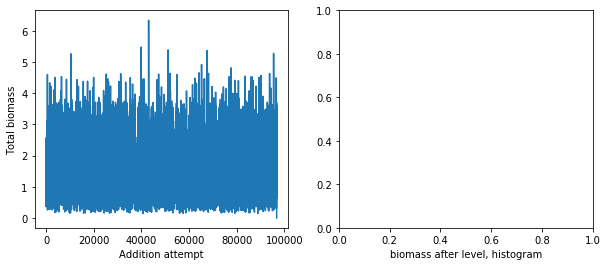

In [10]:
Tot_biomass = np.zeros([Nweb,2])
for web in range(Nweb) :
    Tot_biomass[web] = sum(biomass_i[web]), sum(biomass_f[web])
    

fig, ax = plt.subplots(1,2, figsize=(10,4));
#ax[0].plot(Tot_biomass[:,0], label='initial');
ax[0].plot(Tot_biomass[:,1], label='final');
ax[0].set(xlabel='Addition attempt', ylabel='Total biomass', xscale='linear');
#ax[0].legend();

ax[1].set(xlabel='biomass after level, histogram');

### Sorting links of species

In [64]:
links_i = [0 for i in range(Nweb)]
links_f = [0 for i in range(Nweb)]

minWeb = int(sp_par[0,0])     # first web with non-producer

for web in range(minWeb) :
    N_i, N_f = int(Nspecies[web,0]), int(Nspecies[web,1])            
    links_i[web], links_f[web] = np.zeros([N_i, N_i]), np.zeros([N_f, N_f])
    

sp = 0
for web in range(minWeb, Nweb) :
    i = Nprod[web,0] #int(sp_par[sp,1])
    while sp_par[sp,0] == web : 
        N_i, N_f = int(Nspecies[web,0]), int(Nspecies[web,1])
        matrix_i, matrix_f = np.zeros([N_i, N_i]), np.zeros([N_f, N_f])
    
#       Looping through resources of S_i
        ii, jj = Nprod[web,1], 0
        for j in range (N_i) :
            matrix_i[i,j] = sp_par[sp, 8 + 3*j]       # saving resource temporary
            matrix_i[j,i] = matrix_i[i,j]/beta
            
            if sp_par[sp,1] not in extinct[web] and j not in extinct_index[web] :
                matrix_f[ii,jj] = sp_par[sp, 8 + 3*j]       # saving resource temporary
                matrix_f[jj,ii] = matrix_f[ii,jj]/beta
                jj += 1
            ii += 1
            
        i += 1
        sp += 1
        
#   Adding resources to link-array            
    links_i[web] = matrix_i
    links_f[web] = matrix_f

IndexError: index 2 is out of bounds for axis 0 with size 2

In [65]:
k = 1
print(Nspecies[k,0], Nspecies[k,1])
print(links_i[k])
print(links_f[k])
N_f, ii, jj

2.0 2.0
0
0


(2, 2, 1)

In [318]:
# omnivores
web, level, density = np.array(sp_par[:,0]).astype(int), sp_par[:,3], sp_par[:,4]

integer = np.arange(1,10)
mask = np.zeros(Nweb)
raw_mask = np.zeros(Nweb)

for i in range(len(web)) :
    if level[i] not in integer :
        raw_mask[web[i]] += 1

for i in range(len(web)) :
    if level[i] not in integer :
        if extinct[web[i]] == []:
            mask[web[i]] = 1
        elif web[i] in extinct[web[i]] and len(extinct[web[i]]) == 1 and raw_mask[web[i]] >= 2:
            mask[web[i]] = 1
        
        
        
np.sum(mask), np.sum(raw_mask.astype(bool))

(8932.0, 33925)

Identifying omnivorous webs

In [ ]:
omnivores = np.zeros(Nweb)
Nspecies = np.ones(Nweb)


for i in range(len(data[:,0])) :
    if density[i] == init_density :
        continue;
    elif level[i] not in integer :
        omnivores[web[i]-] += 1
    # number of species when food web stabilized
    Nspecies[web[i]-1] = data[i,1]

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4));
#ax.hist(omnivores/Nspecies);
ax.plot(omnivores/Nspecies);

In [ ]:
data[0:4, 0:6]

In [ ]:
a = 8